# Tensorflow various variants low level, api, functional, model, builtin

In [ ]:
import tensorflow as tf

# Display TensorFlow version to ensure we are using TensorFlow 2.x
tf.__version__

'2.15.0'

In [ ]:
import tensorflow as tf

# Define two constant matrices
matrix1 = tf.constant([[3, 3]])
matrix2 = tf.constant([[2], [2]])

# Perform matrix multiplication
product = tf.matmul(matrix1, matrix2)

print("Result of matrix multiplication is:", product.numpy())

Result of matrix multiplication is: [[12]]


In [ ]:
import tensorflow as tf
from sklearn.datasets import make_circles

# Generate a synthetic dataset
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),  # input layer + hidden layer with 10 neurons
    tf.keras.layers.Dense(10, activation='relu'),                    # additional hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')                   # output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Output the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 2s 13ms/step - loss: 0.6951 - accuracy: 0.4550 - val_loss: 0.6906 - val_accuracy: 0.4450
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.4500 - val_loss: 0.6853 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.5088 - val_loss: 0.6801 - val_accuracy: 0.5150
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.5625 - val_loss: 0.6748 - val_accuracy: 0.5650
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6656 - accuracy: 0.5638 - val_loss: 0.6693 - val_accuracy: 0.5800
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6582 - accuracy: 0.6363 - val_loss: 0.6627 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.6750 - val_loss: 0.6556 - val_accuracy: 0.6700
Epoch 8/100


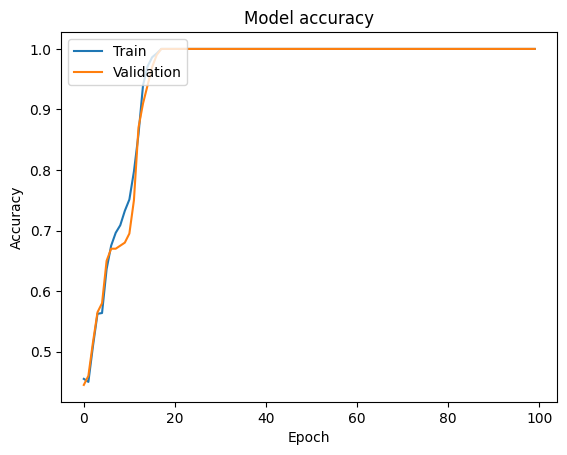

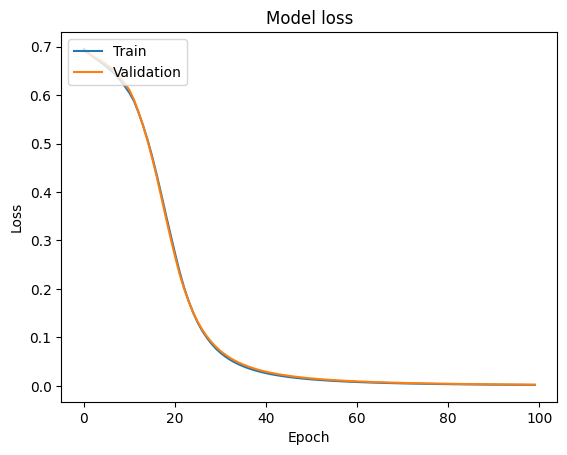

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np

# Assuming you have new input data to predict
new_data = np.array([[0.1, 0.2], [1.2, 0.2], [0.2, 0.2], [1.0, -0.2]])

# Make predictions
predictions = model.predict(new_data)

# Apply threshold to get binary class predictions
# For binary classification, a common threshold is 0.5
binary_predictions = (predictions > 0.5).astype(int)

# Show the predictions
print("Predicted probabilities:", predictions)
print("Binary predictions:", binary_predictions)

1/1 [==============================] - 0s 202ms/step
Predicted probabilities: [[9.9994856e-01]
 [2.6711259e-06]
 [9.9993879e-01]
 [2.2960760e-04]]
Binary predictions: [[1]
 [0]
 [1]
 [0]]




---



# tensorflow only from scratch not using high level api

In [ ]:
# Number of features in the input
n_features = 2
# Number of units in the hidden layer
n_hidden = 10
# Number of outputs (binary classification)
n_output = 1

# Adjusting the data type of weights and biases to match the input data type, which is float64 in this case
W_hidden = tf.Variable(tf.random.normal([n_features, n_hidden], dtype=tf.float64))
b_hidden = tf.Variable(tf.zeros([n_hidden], dtype=tf.float64))
W_output = tf.Variable(tf.random.normal([n_hidden, n_output], dtype=tf.float64))
b_output = tf.Variable(tf.zeros([n_output], dtype=tf.float64))

In [ ]:
def forward_pass(X):
    # Hidden layer
    z_hidden = tf.add(tf.matmul(X, W_hidden), b_hidden)
    a_hidden = tf.nn.relu(z_hidden)

    # Output layer
    logits = tf.add(tf.matmul(a_hidden, W_output), b_output)
    a_output = tf.nn.sigmoid(logits)

    return a_output

In [ ]:
def binary_cross_entropy_loss(y_true, y_pred):
    # Implement binary cross-entropy loss
    loss = -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return loss

def compute_gradients(X, y_true):
    # Use TensorFlow's automatic differentiation
    with tf.GradientTape() as tape:
        y_pred = forward_pass(X)
        loss = binary_cross_entropy_loss(y_true, y_pred)
    # Compute the gradients of the loss with respect to the weights and biases
    gradients = tape.gradient(loss, [W_hidden, b_hidden, W_output, b_output])
    return gradients

In [ ]:
def train(X, y_true, epochs, learning_rate=0.01):
    # Store the loss value for each epoch
    losses = []

    for epoch in range(epochs):
        # Compute the gradients
        gradients = compute_gradients(X, y_true)

        # Update weights and biases
        W_hidden.assign_sub(learning_rate * gradients[0])
        b_hidden.assign_sub(learning_rate * gradients[1])
        W_output.assign_sub(learning_rate * gradients[2])
        b_output.assign_sub(learning_rate * gradients[3])

        # Calculate current loss and append to losses
        y_pred = forward_pass(X)
        loss = binary_cross_entropy_loss(y_true, y_pred)
        losses.append(loss.numpy())

        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}: Loss = {loss.numpy()}')

    return losses

In [ ]:
X = X.astype(np.float64)
y = y.astype(np.float64)

Epoch 10: Loss = 1.2470801615305511
Epoch 20: Loss = 1.1772792789817794
Epoch 30: Loss = 1.1176004450712982
Epoch 40: Loss = 1.0667879208173703
Epoch 50: Loss = 1.023995830197207
Epoch 60: Loss = 0.9874877682187468
Epoch 70: Loss = 0.9556439071653534
Epoch 80: Loss = 0.9277958497267171
Epoch 90: Loss = 0.9035943404031486
Epoch 100: Loss = 0.8825965010934802


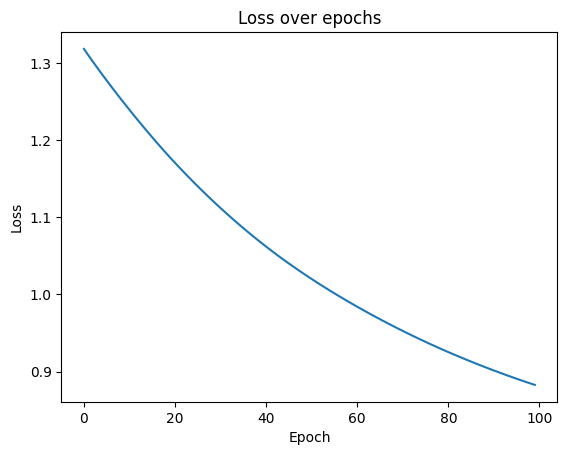

In [ ]:
# Number of epochs to train for
epochs = 100
# Learning rate for the optimizer
learning_rate = 0.01

# Call the train function with the dataset and parameters
losses = train(X, y, epochs, learning_rate)

# After training, plot the losses to visualize the training progress
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

the loss is decreasing over time, which indicates that the model is learning and improving its predictions as training progresses. The fact that the loss decreases at a diminishing rate is typical for the training process; initial gains are often larger, and improvements become more incremental as the model approaches a minimum loss value.



---



# tensorflow only with builtin layers

In [ ]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),  # Hidden layer with 10 units
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit (sigmoid for binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have your dataset loaded in X and y
# For the sake of this example, we are creating a synthetic dataset using make_circles
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# If needed, add data preprocessing steps such as normalization or scaling here

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 2s 42ms/step - loss: 0.7110 - accuracy: 0.4888 - val_loss: 0.6792 - val_accuracy: 0.5550
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.7003 - accuracy: 0.4850 - val_loss: 0.6725 - val_accuracy: 0.5500
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.4888 - val_loss: 0.6660 - val_accuracy: 0.5300
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.4888 - val_loss: 0.6599 - val_accuracy: 0.5200
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.4925 - val_loss: 0.6539 - val_accuracy: 0.5350
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.4913 - val_loss: 0.6479 - val_accuracy: 0.5450
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.5025 - val_loss: 0.6420 - val_accuracy: 0.5650
Epoch 8/100

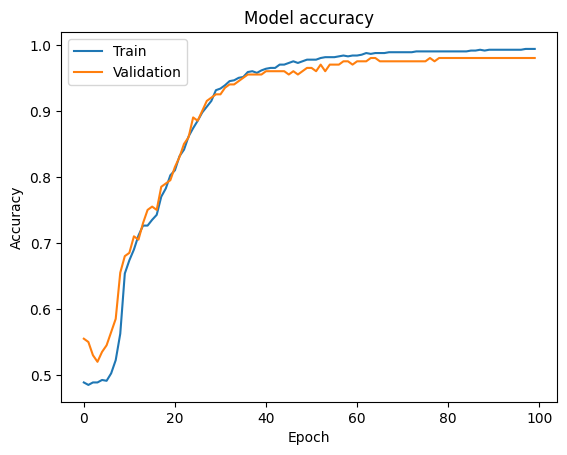

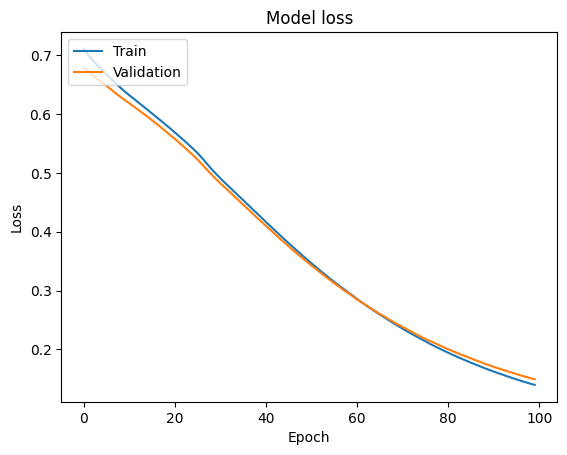

Validation loss: 0.14903779327869415
Validation accuracy: 0.9800000190734863


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')



---



# with Use functional api high level api  of tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the input layer with shape (2,)
inputs = Input(shape=(2,))

# Add a dense hidden layer
x = Dense(10, activation='relu')(inputs)

# Add the output layer
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_5 (Dense)             (None, 10)                30        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Generate the dataset
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# If you have any preprocessing like scaling or normalization, apply it here to X_train and X_val

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/100
25/25 [==============================] - 2s 23ms/step - loss: 0.6620 - accuracy: 0.5200 - val_loss: 0.6660 - val_accuracy: 0.5400
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6561 - accuracy: 0.5475 - val_loss: 0.6603 - val_accuracy: 0.5400
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6503 - accuracy: 0.5575 - val_loss: 0.6551 - val_accuracy: 0.5500
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6445 - accuracy: 0.5688 - val_loss: 0.6486 - val_accuracy: 0.5700
Epoch 5/100
25/25 [==============================] - 0s 13ms/step - loss: 0.6382 - accuracy: 0.6025 - val_loss: 0.6418 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 0s 13ms/step - loss: 0.6318 - accuracy: 0.6237 - val_loss: 0.6356 - val_accuracy: 0.6350
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6259 - accuracy: 0.6538 - val_loss: 0.6300 - val_accuracy: 0.6650
Epoch 8/

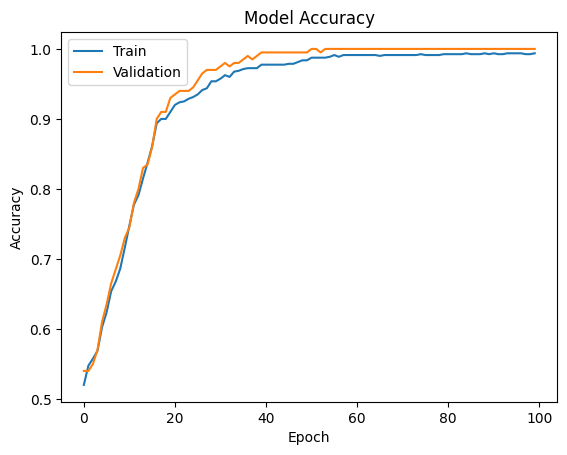

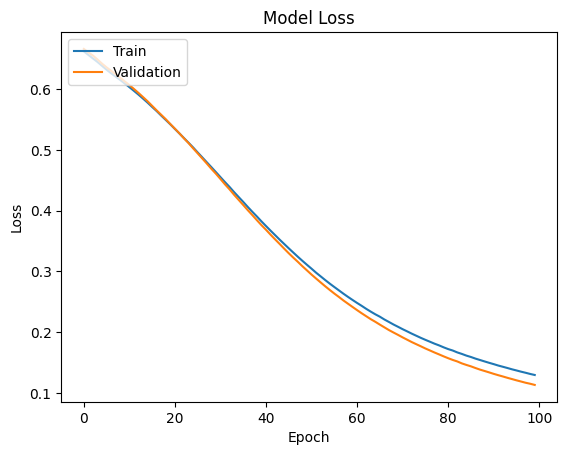

Validation loss: 0.11338792741298676
Validation accuracy: 1.0


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')



---



# tensorflow only but using high level API

In [ ]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),  # Hidden layer with 10 units
    tf.keras.layers.Dense(1, activation='sigmoid')                   # Output layer with 1 unit
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                30        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# If needed, any data preprocessing steps would go here

In [ ]:
# Define a callback to monitor the validation loss
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_callback]  # Include the early stopping callback
)

Epoch 1/100
25/25 [==============================] - 1s 18ms/step - loss: 0.6578 - accuracy: 0.4963 - val_loss: 0.6276 - val_accuracy: 0.5300
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.5088 - val_loss: 0.6235 - val_accuracy: 0.5550
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6465 - accuracy: 0.5188 - val_loss: 0.6193 - val_accuracy: 0.5600
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6411 - accuracy: 0.5325 - val_loss: 0.6145 - val_accuracy: 0.5750
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6353 - accuracy: 0.5487 - val_loss: 0.6094 - val_accuracy: 0.6000
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6293 - accuracy: 0.5775 - val_loss: 0.6044 - val_accuracy: 0.6350
Epoch 7/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6233 - accuracy: 0.5938 - val_loss: 0.5990 - val_accuracy: 0.6650
Epoch 8/100

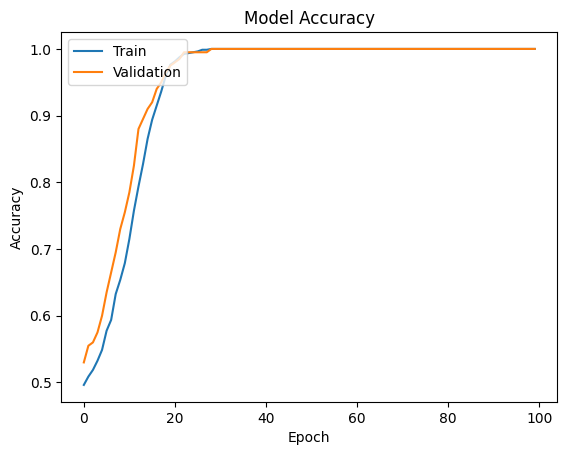

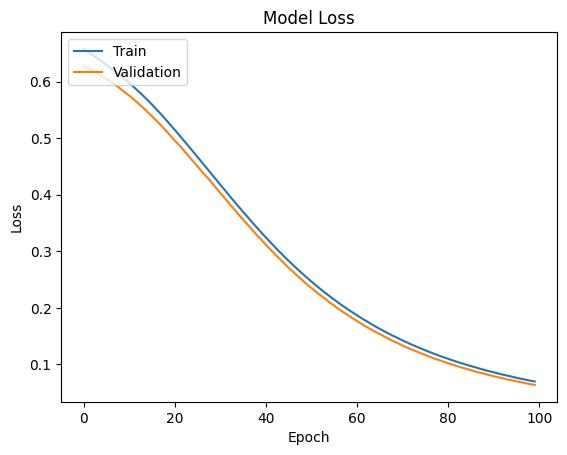

Validation loss: 0.06369150429964066
Validation accuracy: 1.0


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')